In [33]:
import importlib
importlib.reload(RasterClass)
# importlib.reload(Columbia_Forest_Predictor)

<module 'RasterClass' from '/home/local/AMA-INC/amelbag/aviv_notebook_server/entrenamiento/RasterClass.py'>

# Condensed RasterClass  

## By Aviv Elbag for Analytical Mechanics Associates

Import RasterClass

In [12]:
import RasterClass

In [13]:
dir(RasterClass)

['Proj',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'b',
 'binary_rasterize',
 'clip',
 'clip_from_shape',
 'coTran',
 'composite',
 'datacube',
 'dc',
 'get_map',
 'gpd',
 'imresize',
 'is_l7_dataset_clean',
 'np',
 'os',
 'plt',
 'rasterize',
 'rasterize_and_separate',
 'read_folder',
 'run_example',
 'shape',
 'transform']

### Given a shape we can first turn it into a boolean array where we can resample to a given map. From there, we can use this boolean array as a mask on our map and get a masked map. 

In [14]:
from rasterio import transform
import geopandas as gpd
from pyproj import Proj
from pyproj import transform as coTran
import datacube
import numpy as np
from shapely.geometry import shape
import matplotlib.pyplot as plt
from rasterio.features import rasterize
from scipy.misc import imresize
import os

In [15]:
for file in os.listdir():
    print(file)

__pycache__
colombia_random_forest_state
RasterClass.py
311.sbx
314.sbn
314.dbf
311.CPG
2.dbf
311.shp
example_classifier
314.shx
Condensed memClass.ipynb
untitled.txt
RasterClass.ipynb
4.sbn
32.sbn
river_and_two_forests
1.sbn
LandCover.txt
example_classifier5
utils
323.shp.xml
311.dbf
323.shp
example_classifier2
314.sbx
test
1.shx
4.sbx
32.CPG
Columbia_Forest_Predictor.py
1.dbf
32.sbx
All3
4.prj
32.shp
2.shp
all_classes
311.shx
323.sbn
323.prj
323.dbf
32.dbf
32.shp.xml
323.CPG
Condensed RasterClass.ipynb
Condensed memClass-[Otto Testing].ipynb
Untitled.ipynb
rivers_and_one_forest
4.cpg
2.sbn
2.sbx
example_classifier3
311.shp.xml
1.cpg
1.sbx
314.shp.xml
4.shp
example_classifier6
1.shp
thing.tif
314.CPG
2.shx
classification.tif
2.prj
just_rivers
Condensed RasterClass[Otto Testing].ipynb
RasterClass-Copy[Otto Testing].ipynb
323.shx
32.shx
311.prj
4.dbf
1.prj
train
323.sbx
example_classifier4
All2
311.sbn
32.prj
314.shp
.ipynb_checkpoints
4.shx
2.cpg
314.prj


In [16]:
one = gpd.GeoDataFrame()
for file in os.listdir():
    if file.endswith(".shp"):
        One = gpd.read_file(file)
        one = one.append(One)
for elem in one.geometry:
    A = elem
    break

A single shape file:

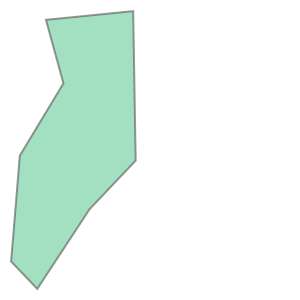

In [17]:
A

### binary_rasterize
#### This takes a shape file and converts it to a boolean raster in the correct coordinate syste

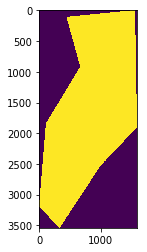

In [30]:
img,minx1,maxx1,miny1,maxy1= RasterClass.binary_rasterize(A)
plt.imshow(img)

The bounding box coordinates are given by the other outputs

In [31]:
print(minx1,maxx1,miny1,maxy1)

599791.7353151419 223395.5421561614 601379.2384901487 226935.67423642508


### get_map 
gets the map from a given bounding box, datacube product, measurements and time.

In [34]:
img2 = RasterClass.get_map(minx1,miny1,maxx1,maxy1,coordinate_system='EPSG:32618')

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*


AttributeError: 'Dataset' object has no attribute 'pixel_qa'

In [23]:
img2.shape

NameError: name 'img2' is not defined

In [24]:
plt.imshow(img2)

NameError: name 'img2' is not defined

## clip 
resamples the boolean array and clips it from a given map array

In [25]:
img3,img4 = RasterClass.clip(img, img2)

NameError: name 'img2' is not defined

The resampled boolean array

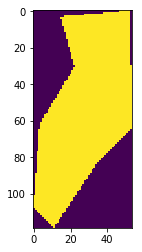

In [39]:
plt.imshow(img3)

The clipped map

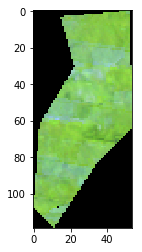

In [40]:
plt.imshow(img4)

### clip_from_shape
clip_from_shape does all this straight from the shape itself

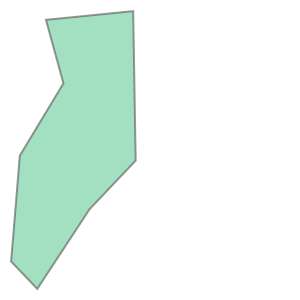

In [41]:
A

In [43]:
[img5,img6,img7,img8] = RasterClass.clip_from_shape(A)

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


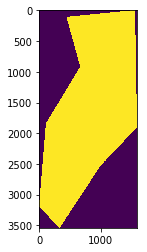

In [44]:
plt.imshow(img5)

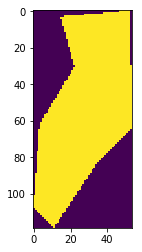

In [45]:
plt.imshow(img6)

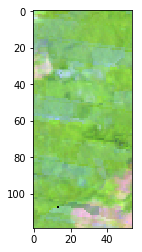

In [46]:
plt.imshow(img7)

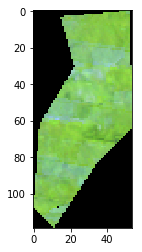

In [47]:
plt.imshow(img8)

## rasterize_and_seperate
If you an array of many shapes and you know where the shape is located in the coordinate system. You can rasterize them into groups using this function.

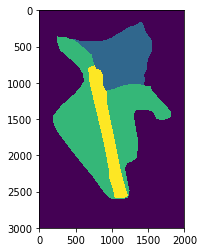

In [59]:
One= gpd.read_file('1.shp')
T = transform.from_origin(634000,242000,1,1)

plt.imshow(RasterClass.rasterize_and_separate(One,transform=T))

### To do: Explain the composite function and is clean function. 

In [ ]:
dc.